# Problem Statement:

# The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

# Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Approach:


# Dividing the dataframe based on product and then analyzing the continuous and categorical parameters influence will help to customise the product for Customers.

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\chapp\Downloads\aerofit_treadmill.csv")
df.head()

,"Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles"
0,"KP281,18,Male,14,Single,3,4,29562,112"
1,"KP281,19,Male,15,Single,2,3,31836,75"
2,"KP281,19,Female,14,Partnered,4,3,30699,66"
3,"KP281,19,Male,12,Single,3,3,32973,85"
4,"KP281,20,Male,13,Partnered,4,2,35247,47"


In [3]:
columns1=list(df.columns)[0].split(",")
print(columns1)

['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']


In [4]:
l=[]
for i in range(len(df)):
    v=list(df.loc[i,:])
    l.append(v[0].split(","))
    
c=pd.DataFrame(l,columns=columns1)
c.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
c.shape

(180, 9)

In [6]:
c['Age']=c['Age'].astype(int)
c['Education']=c['Education'].astype(int)
c['Usage']=c['Usage'].astype(int)
c['Fitness']=c['Fitness'].astype(int)
c['Income']=c['Income'].astype(int)
c['Miles']=c['Miles'].astype(int)

In [7]:
c.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
c['Product'].value_counts()


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [9]:
c.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [10]:
c.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


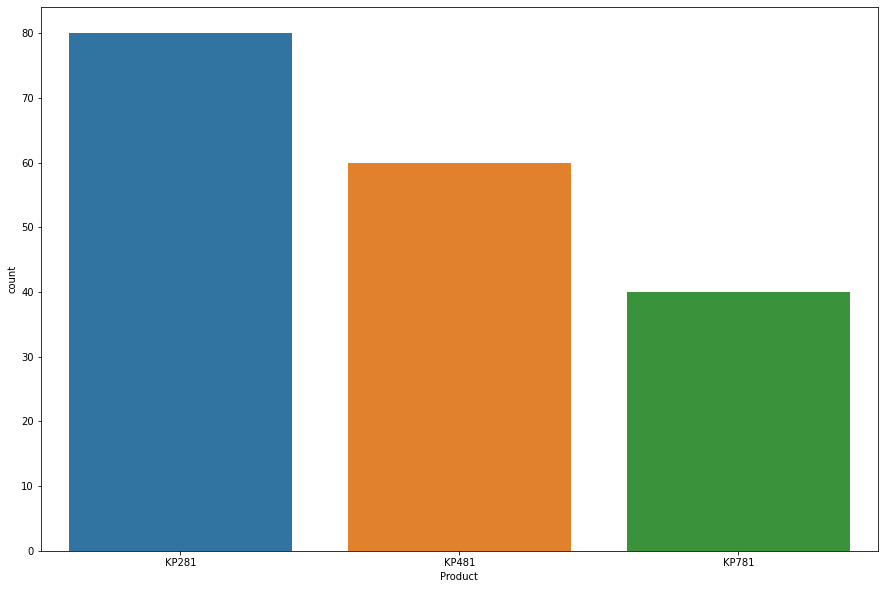

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data = c, x='Product')
plt.show()

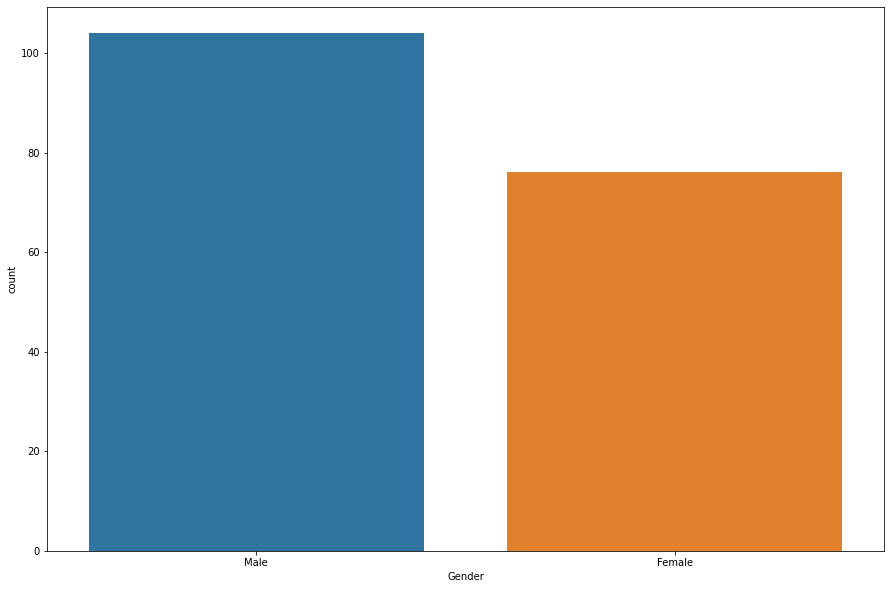

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data = c, x='Gender')
plt.show()

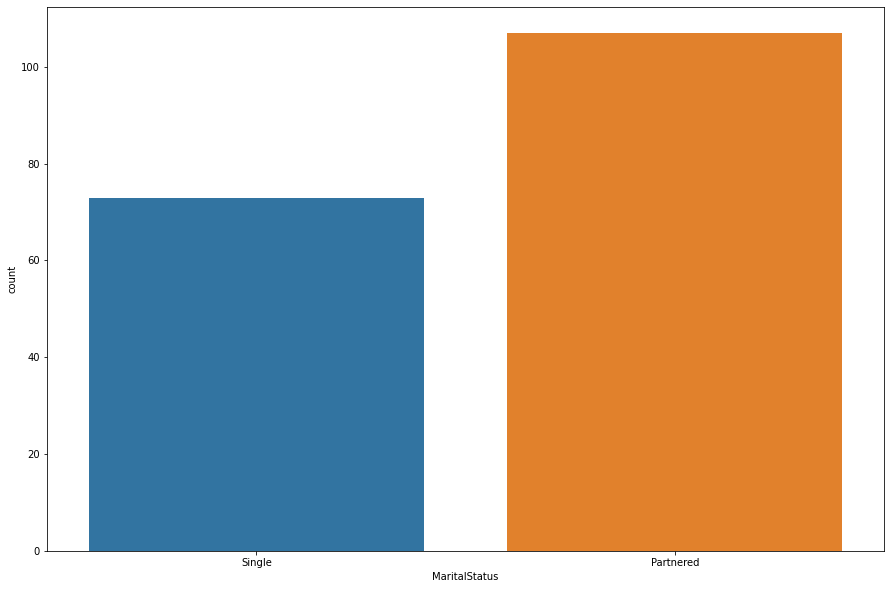

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data = c, x='MaritalStatus')
plt.show()

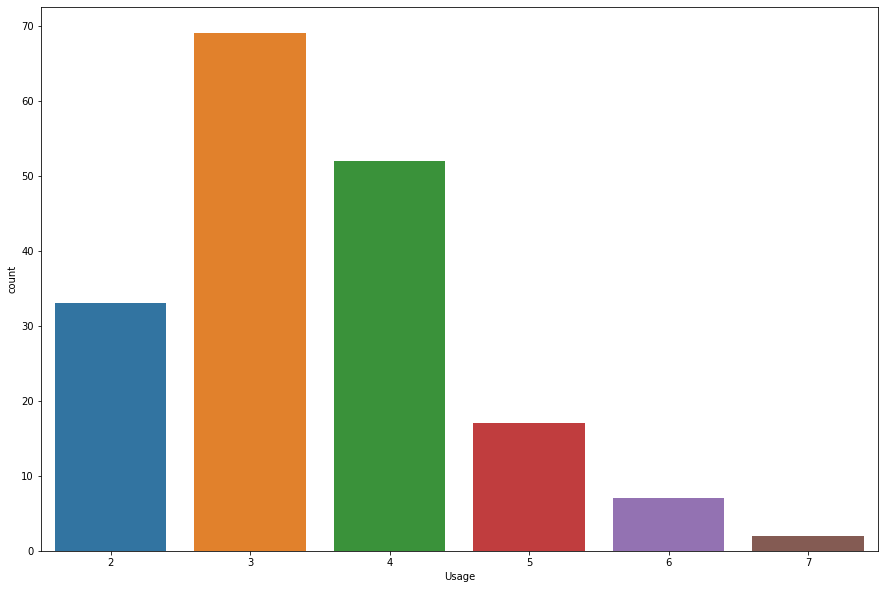

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data = c, x='Usage')
plt.show()

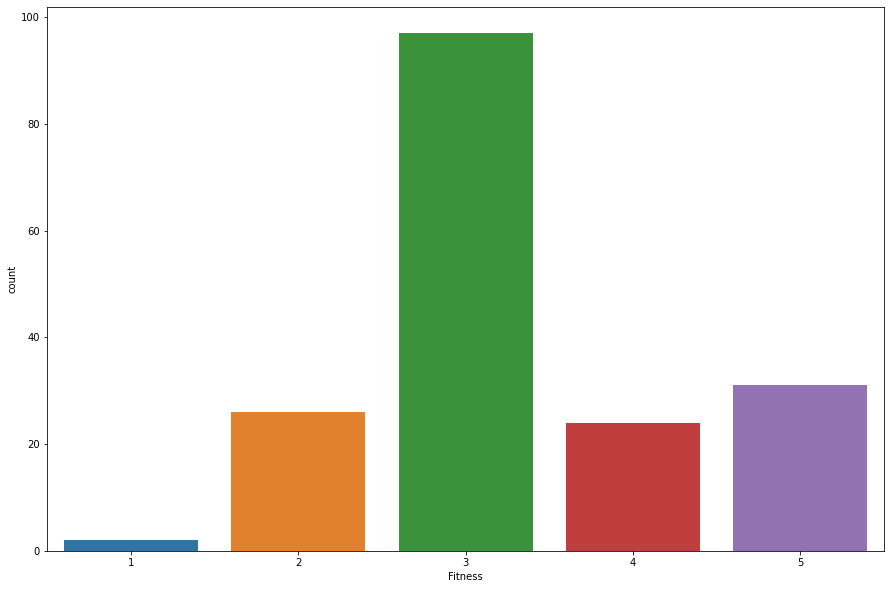

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data = c, x='Fitness')
plt.show()

<Figure size 1080x720 with 0 Axes>

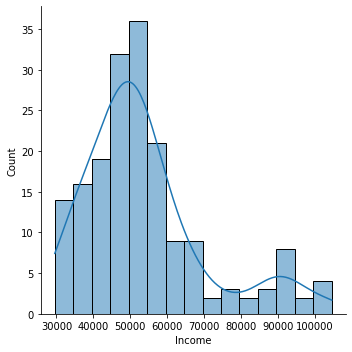

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.displot(data=c,x='Income',kde=True)
plt.show()

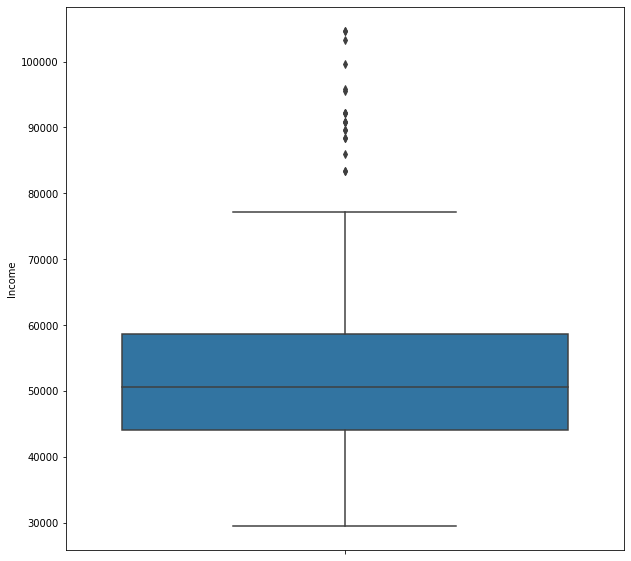

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=c,y='Income')
plt.show()

In [18]:
q1=c['Income'].quantile(0.25)
q3=c['Income'].quantile(0.75)
iqr=q3-q1
outliers1=q1-1.5*iqr
outliers2=q3+1.5*iqr

count = c['Income']<outliers1
count1=len(c[count])
count11=c['Income']>outliers2
count2=len(c[count11])
print("number of outliers1:\n",count1,"\nnumber of outliers2:\n",count2)

number of outliers1:
 0 
number of outliers2:
 19


In [19]:
# As there is not that significant percent of outliers, mean can be used to know about the data.

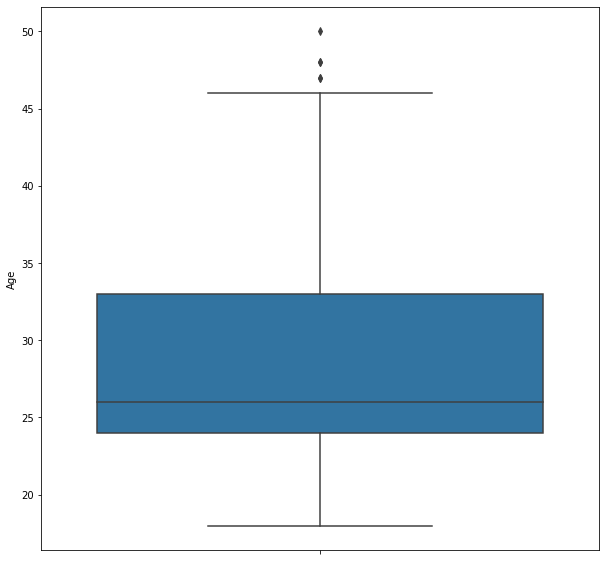

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=c,y='Age')
plt.show()

In [21]:
q1=c['Age'].quantile(0.25)
q3=c['Age'].quantile(0.75)
iqr=q3-q1
outliers1=q1-1.5*iqr
outliers2=q3+1.5*iqr

count = c['Age']<outliers1
count1=len(c[count])
count11=c['Age']>outliers2
count2=len(c[count11])
print("number of outliers1:\n",count1,"\nnumber of outliers2:\n",count2)

number of outliers1:
 0 
number of outliers2:
 5


In [22]:
# Mean is least affected by the outliers for parameter age.

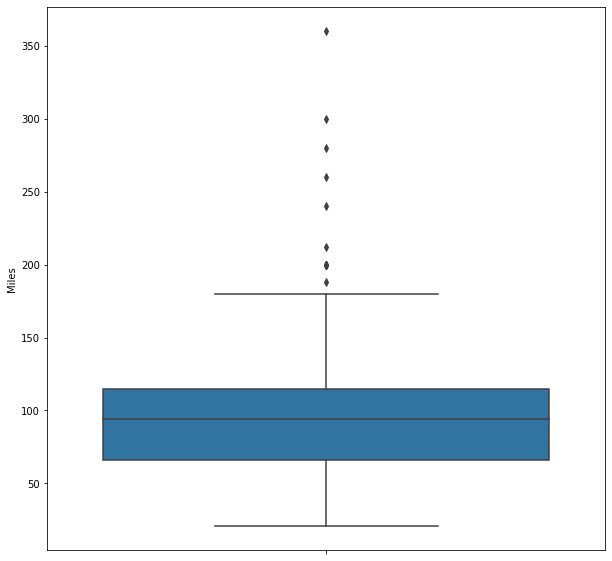

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=c,y='Miles')
plt.show()

In [24]:
q1=c['Miles'].quantile(0.25)
q3=c['Miles'].quantile(0.75)
iqr=q3-q1
outliers1=q1-1.5*iqr
outliers2=q3+1.5*iqr

count = c['Miles']<outliers1
count1=len(c[count])
count11=c['Miles']>outliers2
count2=len(c[count11])
print("number of outliers1:\n",count1,"\nnumber of outliers2:\n",count2)

number of outliers1:
 0 
number of outliers2:
 13


In [25]:
# Mean can be used as measure of central tendency for parameter Miles.

<Figure size 1440x720 with 0 Axes>

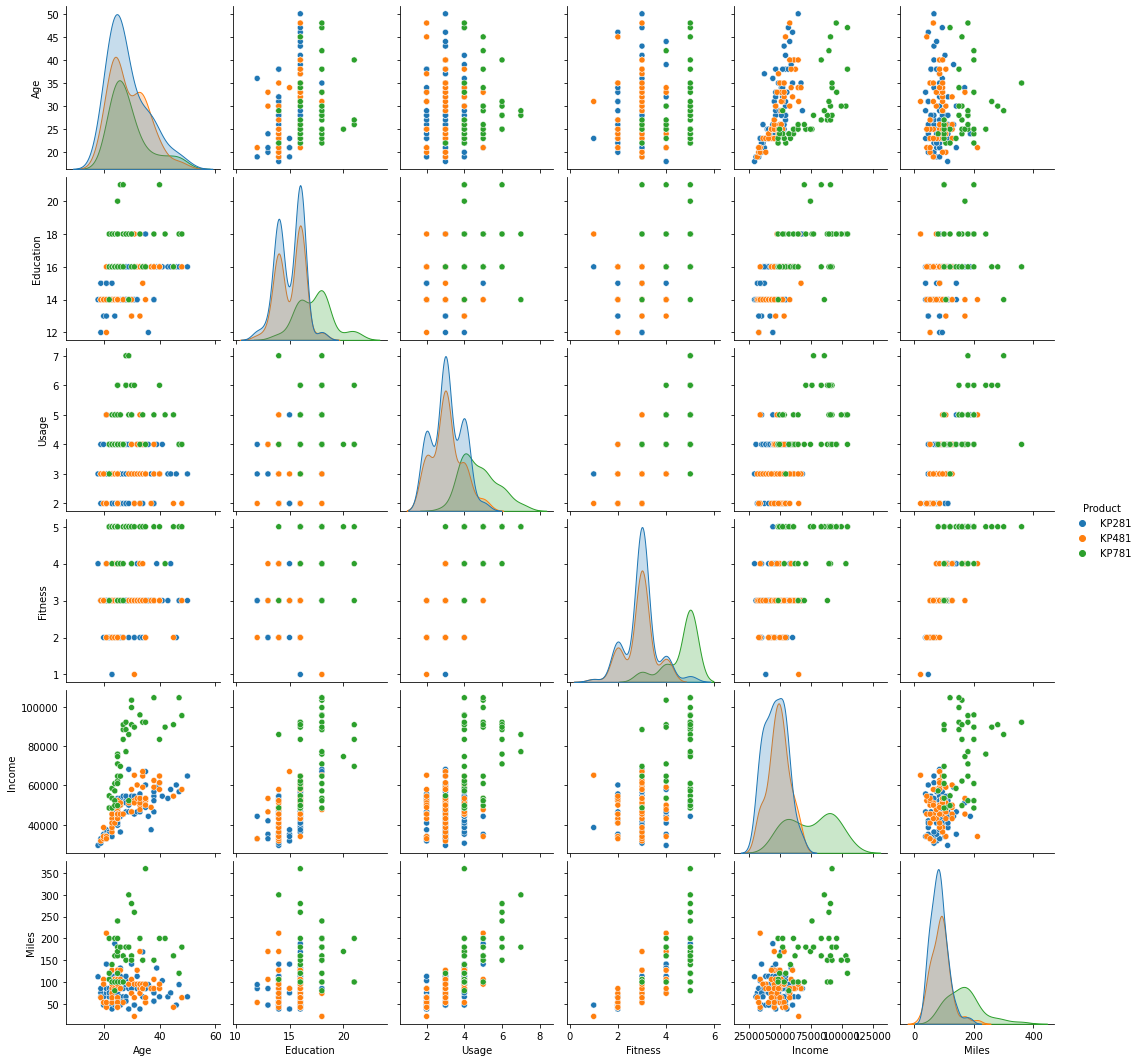

In [26]:
plt.figure(figsize=(20,10))

sns.pairplot(c,hue='Product')
plt.show()

In [27]:
c.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [28]:
c['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

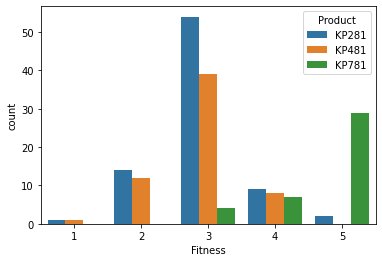

<Figure size 1080x720 with 0 Axes>

In [29]:
sns.countplot(data=c,x='Fitness',hue='Product')
plt.figure(figsize=(15,10))
plt.show()

# Customers whose Fitness rating is 3 will mostly buy KP281 and KP481 and customers whose fitness rating is 5 will buy KP781

In [30]:
c['onlyKP281'] = np.where(c['Product']=='KP281', 1, 0)
c.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,onlyKP281
0,KP281,18,Male,14,Single,3,4,29562,112,1
1,KP281,19,Male,15,Single,2,3,31836,75,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,1
3,KP281,19,Male,12,Single,3,3,32973,85,1
4,KP281,20,Male,13,Partnered,4,2,35247,47,1


In [31]:
survey_data = pd.crosstab(index=c['Gender'], columns=c['onlyKP281'],margins=True)
survey_data

onlyKP281,0,1,All
Gender,,,
Female,36,40,76
Male,64,40,104
All,100,80,180


In [32]:
#P(A): probbability of being male
survey_data.iloc[1,2]/survey_data.iloc[2,2]

0.5777777777777777

In [33]:
#P(A): probbability of being female
survey_data.iloc[0,2]/survey_data.iloc[2,2]


0.4222222222222222

In [34]:
#probbability of being male and buying KP281
survey_data.iloc[1,1]/survey_data.iloc[2,2]

0.2222222222222222

In [35]:
#probbability of being female and buying KP281
survey_data.iloc[0,1]/survey_data.iloc[2,2]

0.2222222222222222

# Gender parameter has no influence on buying KP281

In [36]:
survey_data_on_martialstatus = pd.crosstab(index=c['MaritalStatus'], columns=c['onlyKP281'],margins=True)
survey_data_on_martialstatus

onlyKP281,0,1,All
MaritalStatus,,,
Partnered,59,48,107
Single,41,32,73
All,100,80,180


In [37]:
#Probability of MaritalStatus as Single
survey_data_on_martialstatus.iloc[1,2]/survey_data_on_martialstatus.iloc[2,2]

0.40555555555555556

In [38]:
#Probability of MaritalStatus as Partnered
survey_data_on_martialstatus.iloc[0,2]/survey_data_on_martialstatus.iloc[2,2]

0.5944444444444444

In [39]:
#Probability of MaritalStatus as Partnered and buying KP281
survey_data_on_martialstatus.iloc[0,1]/survey_data.iloc[2,2]

0.26666666666666666

In [40]:
#Probability of MaritalStatus as Single and buying KP281
survey_data_on_martialstatus.iloc[1,1]/survey_data.iloc[2,2]

0.17777777777777778

# Probability of MaritalStatus as Partnered and buying KP281 is greater than Probability of MaritalStatus as Single and buying KP281

In [41]:
average_income=c['Income'].mean()
c['above_average_income']=np.where(c['Income']>=average_income,1,0)


In [42]:
survey_data_based_on_Income = pd.crosstab(index=c['above_average_income'], columns=c['onlyKP281'],margins=True)
survey_data_based_on_Income

onlyKP281,0,1,All
above_average_income,,,
0,55,62,117
1,45,18,63
All,100,80,180


In [43]:
#probability of having an income above average Income
survey_data_based_on_Income.iloc[1,2]/survey_data_based_on_Income.iloc[2,2]

0.35

In [44]:
#probability of having an income below average Income
survey_data_based_on_Income.iloc[0,2]/survey_data_based_on_Income.iloc[2,2]

0.65

In [45]:
#probability of having an income above average Income and buying KP281
survey_data_based_on_Income.iloc[1,1]/survey_data_based_on_Income.iloc[2,2]

0.1

In [46]:
#probability of having an income below average Income and buying KP281
survey_data_based_on_Income.iloc[0,1]/survey_data_based_on_Income.iloc[2,2]

0.34444444444444444

# probability of having an income below average Income and buying KP281 is greater than probability of having an income above average Income and buying KP281

In [47]:
int_value_of_usage_hours=int(c['Usage'].mean())

c['int_value_of_usage_hours']=np.where(c['Usage']>=int_value_of_usage_hours,1,0)

In [48]:
survey_data_based_on_usage = pd.crosstab(index=c['int_value_of_usage_hours'], columns=c['onlyKP281'],margins=True)
survey_data_based_on_usage

onlyKP281,0,1,All
int_value_of_usage_hours,,,
0,14,19,33
1,86,61,147
All,100,80,180


In [49]:
#probability of above usage hours
survey_data_based_on_usage.iloc[1,2]/survey_data_based_on_usage.iloc[2,2]

0.8166666666666667

In [50]:
#probability of below usage hours
survey_data_based_on_usage.iloc[0,2]/survey_data_based_on_usage.iloc[2,2]

0.18333333333333332

In [51]:
#probability of above usage hours and buying KP281
survey_data_based_on_usage.iloc[1,1]/survey_data_based_on_usage.iloc[2,2]

0.3388888888888889

In [52]:
#probability of below usage hours and buying KP281
survey_data_based_on_usage.iloc[0,1]/survey_data_based_on_usage.iloc[2,2]

0.10555555555555556

# probability of above usage hours and buying KP281 is greater than probability of below usage hours and buying KP281

In [53]:
central_val_for_age=int(c['Age'].mean())

c['central_val_for_age']=np.where(c['Age']>=central_val_for_age,1,0)


In [54]:
survey_data_based_on_age = pd.crosstab(index=c['central_val_for_age'], columns=c['onlyKP281'],margins=True)
survey_data_based_on_age

onlyKP281,0,1,All
central_val_for_age,,,
0,54,44,98
1,46,36,82
All,100,80,180


In [55]:
#probability of selecting consumers above mean of the Age parameter
survey_data_based_on_age.iloc[1,2]/survey_data_based_on_usage.iloc[2,2]

0.45555555555555555

In [56]:
#probability of selecting consumers below mean of the Age parameter
survey_data_based_on_age.iloc[0,2]/survey_data_based_on_usage.iloc[2,2]

0.5444444444444444

In [57]:
#probability of above mean age and buying KP281
survey_data_based_on_age.iloc[1,1]/survey_data_based_on_age.iloc[2,2]

0.2

In [58]:
#probability of below mean age and buying KP281
survey_data_based_on_age.iloc[0,1]/survey_data_based_on_age.iloc[2,2]

0.24444444444444444

# Customers with below mean age are more likely to purchase KP281

In [59]:
central_val_for_miles=int(c['Miles'].mean())

c['central_val_for_miles']=np.where(c['Miles']>=central_val_for_age,1,0)


In [60]:
survey_data_based_on_miles = pd.crosstab(index=c['central_val_for_miles'], columns=c['onlyKP281'],margins=True)
survey_data_based_on_miles

onlyKP281,0,1,All
central_val_for_miles,,,
0,1,0,1
1,99,80,179
All,100,80,180


In [61]:
#probability of selecting consumers above mean of the miles parameter
survey_data_based_on_miles.iloc[1,2]/survey_data_based_on_miles.iloc[2,2]

0.9944444444444445

In [62]:
#probability of selecting consumers below mean of the miles parameter
survey_data_based_on_miles.iloc[0,2]/survey_data_based_on_miles.iloc[2,2]

0.005555555555555556

In [63]:
#probability of above mean miles and buying KP281
survey_data_based_on_miles.iloc[1,1]/survey_data_based_on_miles.iloc[2,2]

0.4444444444444444

In [64]:
#probability of below mean miles and buying KP281
survey_data_based_on_miles.iloc[0,1]/survey_data_based_on_miles.iloc[2,2]

0.0

# Customers with above mean miles  will mostly purchase KP281

In [65]:
c['onlyKP481'] = np.where(c['Product']=='KP481', 1, 0)
c[30:]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,onlyKP281,above_average_income,int_value_of_usage_hours,central_val_for_age,central_val_for_miles,onlyKP481
30,KP281,25,Female,14,Partnered,3,3,39795,85,1,0,1,0,1,0
31,KP281,25,Male,16,Single,3,4,40932,113,1,0,1,0,1,0
32,KP281,25,Female,16,Partnered,2,2,40932,47,1,0,0,0,1,0
33,KP281,25,Male,16,Single,3,3,43206,85,1,0,1,0,1,0
34,KP281,26,Female,14,Partnered,3,4,44343,113,1,0,1,0,1,0
35,KP281,26,Female,16,Partnered,4,3,52302,113,1,0,1,0,1,0
36,KP281,26,Male,16,Partnered,2,2,53439,47,1,0,0,0,1,0
37,KP281,26,Male,16,Partnered,3,3,51165,85,1,0,1,0,1,0
38,KP281,26,Female,16,Single,3,3,36384,66,1,0,1,0,1,0
39,KP281,26,Male,16,Partnered,4,4,44343,132,1,0,1,0,1,0


In [66]:
survey_data = pd.crosstab(index=c['Gender'], columns=c['onlyKP481'],margins=True)
survey_data

onlyKP481,0,1,All
Gender,,,
Female,47,29,76
Male,73,31,104
All,120,60,180


In [67]:
#P(A): probbability of being male
survey_data.iloc[1,2]/survey_data.iloc[2,2]

0.5777777777777777

In [68]:
#P(A): probbability of being female
survey_data.iloc[0,2]/survey_data.iloc[2,2]

0.4222222222222222

In [69]:
#probbability of being male and buying KP481
survey_data.iloc[1,1]/survey_data.iloc[2,2]

0.17222222222222222

In [70]:
#probbability of being female and buying KP481
survey_data.iloc[0,1]/survey_data.iloc[2,2]

0.16111111111111112

# Gender has slight influence on the purchase of KP481

In [71]:
survey_data_based_on_age = pd.crosstab(index=c['central_val_for_age'], columns=c['onlyKP481'],margins=True)
survey_data_based_on_age

onlyKP481,0,1,All
central_val_for_age,,,
0,66,32,98
1,54,28,82
All,120,60,180


In [72]:
#probability of selecting consumers above mean of the Age parameter
survey_data_based_on_age.iloc[1,2]/survey_data_based_on_usage.iloc[2,2]

0.45555555555555555

In [73]:
#probability of selecting consumers below mean of the Age parameter
survey_data_based_on_age.iloc[0,2]/survey_data_based_on_usage.iloc[2,2]

0.5444444444444444

In [74]:
#probability of above mean age and buying KP481
survey_data_based_on_age.iloc[1,1]/survey_data_based_on_age.iloc[2,2]

0.15555555555555556

In [75]:
#probability of below mean age and buying KP481
survey_data_based_on_age.iloc[0,1]/survey_data_based_on_age.iloc[2,2]

0.17777777777777778

# Parameter  Age has slight influence on the purchase of KP481

In [76]:
survey_data_based_on_Income = pd.crosstab(index=c['above_average_income'], columns=c['onlyKP481'],margins=True)
survey_data_based_on_Income

onlyKP481,0,1,All
above_average_income,,,
0,70,47,117
1,50,13,63
All,120,60,180


In [77]:
#probability of having an income below average Income
survey_data_based_on_Income.iloc[0,2]/survey_data_based_on_Income.iloc[2,2]

0.65

In [78]:
#probability of having an income above average Income
survey_data_based_on_Income.iloc[1,2]/survey_data_based_on_Income.iloc[2,2]

0.35

In [79]:
#probability of having an income above average Income and buying KP481
survey_data_based_on_Income.iloc[1,1]/survey_data_based_on_Income.iloc[2,2]

0.07222222222222222

In [80]:
#probability of having an income below average Income and buying KP481
survey_data_based_on_Income.iloc[0,1]/survey_data_based_on_Income.iloc[2,2]

0.2611111111111111

# Customers with Income below the mean of Income parameter will mostly buy KP481

In [81]:
survey_data_on_martialstatus = pd.crosstab(index=c['MaritalStatus'], columns=c['onlyKP481'],margins=True)
survey_data_on_martialstatus

onlyKP481,0,1,All
MaritalStatus,,,
Partnered,71,36,107
Single,49,24,73
All,120,60,180


In [82]:
#Probability of MaritalStatus as Single
survey_data_on_martialstatus.iloc[1,2]/survey_data_on_martialstatus.iloc[2,2]

0.40555555555555556

In [83]:
#Probability of MaritalStatus as Partnered
survey_data_on_martialstatus.iloc[0,2]/survey_data_on_martialstatus.iloc[2,2]

0.5944444444444444

In [84]:
#Probability of MaritalStatus as Partnered and buying KP481
survey_data_on_martialstatus.iloc[0,1]/survey_data.iloc[2,2]

0.2

In [85]:
#Probability of MaritalStatus as Single and buying KP481
survey_data_on_martialstatus.iloc[1,1]/survey_data.iloc[2,2]

0.13333333333333333

# Customers who are partnered are more likely to purchase KP481

In [86]:
survey_data_based_on_usage = pd.crosstab(index=c['int_value_of_usage_hours'], columns=c['onlyKP481'],margins=True)
survey_data_based_on_usage

onlyKP481,0,1,All
int_value_of_usage_hours,,,
0,19,14,33
1,101,46,147
All,120,60,180


In [87]:
#probability of above usage hours
survey_data_based_on_usage.iloc[1,2]/survey_data_based_on_usage.iloc[2,2]

0.8166666666666667

In [88]:
#probability of below usage hours
survey_data_based_on_usage.iloc[0,2]/survey_data_based_on_usage.iloc[2,2]

0.18333333333333332

In [89]:
#probability of above usage hours and buying KP481
survey_data_based_on_usage.iloc[1,1]/survey_data_based_on_usage.iloc[2,2]

0.25555555555555554

In [90]:
#probability of below usage hours and buying KP481
survey_data_based_on_usage.iloc[0,1]/survey_data_based_on_usage.iloc[2,2]

0.07777777777777778

# Customers who prefer above average hours will mostly purchase KP481

In [91]:
survey_data_based_on_miles = pd.crosstab(index=c['central_val_for_miles'], columns=c['onlyKP481'],margins=True)
survey_data_based_on_miles

onlyKP481,0,1,All
central_val_for_miles,,,
0,0,1,1
1,120,59,179
All,120,60,180


In [92]:
#probability of selecting consumers above mean of the miles parameter
survey_data_based_on_miles.iloc[1,2]/survey_data_based_on_miles.iloc[2,2]

0.9944444444444445

In [93]:
#probability of selecting consumers below mean of the miles parameter
survey_data_based_on_miles.iloc[0,2]/survey_data_based_on_miles.iloc[2,2]

0.005555555555555556

In [94]:
#probability of above mean miles and buying KP481
survey_data_based_on_miles.iloc[1,1]/survey_data_based_on_miles.iloc[2,2]

0.3277777777777778

In [95]:
#probability of below mean miles and buying KP481
survey_data_based_on_miles.iloc[0,1]/survey_data_based_on_miles.iloc[2,2]

0.005555555555555556

# Customers who prefer above average miles will prefer KP481 with a great margin

In [96]:
c['onlyKP781'] = np.where(c['Product']=='KP781', 1, 0)
c[150:].head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,onlyKP281,above_average_income,int_value_of_usage_hours,central_val_for_age,central_val_for_miles,onlyKP481,onlyKP781
150,KP781,25,Male,16,Partnered,4,5,49801,120,0,0,1,0,1,0,1
151,KP781,25,Male,16,Partnered,4,4,62251,160,0,1,1,0,1,0,1
152,KP781,25,Female,18,Partnered,5,5,61006,200,0,1,1,0,1,0,1
153,KP781,25,Male,18,Partnered,4,3,64741,100,0,1,1,0,1,0,1
154,KP781,25,Male,18,Partnered,6,4,70966,180,0,1,1,0,1,0,1


In [97]:
survey_data = pd.crosstab(index=c['Gender'], columns=c['onlyKP781'],margins=True)
survey_data

onlyKP781,0,1,All
Gender,,,
Female,69,7,76
Male,71,33,104
All,140,40,180


In [98]:
#P(A): probbability of being male
survey_data.iloc[1,2]/survey_data.iloc[2,2]

0.5777777777777777

In [99]:
#P(A): probbability of being female
survey_data.iloc[0,2]/survey_data.iloc[2,2]

0.4222222222222222

In [100]:
#probbability of being male and buying KP781
survey_data.iloc[1,1]/survey_data.iloc[2,2]

0.18333333333333332

In [101]:
#probbability of being female and buying KP781
survey_data.iloc[0,1]/survey_data.iloc[2,2]

0.03888888888888889

# Male customers significantly prefer to buy KP781 than female customers

In [102]:
survey_data_based_on_age = pd.crosstab(index=c['central_val_for_age'], columns=c['onlyKP781'],margins=True)
survey_data_based_on_age

onlyKP781,0,1,All
central_val_for_age,,,
0,76,22,98
1,64,18,82
All,140,40,180


In [103]:
#probability of selecting consumers above mean of the Age parameter
survey_data_based_on_age.iloc[1,2]/survey_data_based_on_usage.iloc[2,2]

0.45555555555555555

In [104]:
#probability of selecting consumers below mean of the Age parameter
survey_data_based_on_age.iloc[0,2]/survey_data_based_on_usage.iloc[2,2]

0.5444444444444444

In [105]:
#probability of above mean age and buying KP781
survey_data_based_on_age.iloc[1,1]/survey_data_based_on_age.iloc[2,2]

0.1

In [106]:
#probability of below mean age and buying KP781
survey_data_based_on_age.iloc[0,1]/survey_data_based_on_age.iloc[2,2]

0.12222222222222222

# Age parameter has little influence on the purchase of KP781

In [107]:
survey_data_based_on_Income = pd.crosstab(index=c['above_average_income'], columns=c['onlyKP781'],margins=True)
survey_data_based_on_Income

onlyKP781,0,1,All
above_average_income,,,
0,109,8,117
1,31,32,63
All,140,40,180


In [108]:
#probability of having an income below average Income
survey_data_based_on_Income.iloc[0,2]/survey_data_based_on_Income.iloc[2,2]

0.65

In [109]:
#probability of having an income above average Income
survey_data_based_on_Income.iloc[1,2]/survey_data_based_on_Income.iloc[2,2]

0.35

In [110]:
#probability of having an income above average Income and buying KP781
survey_data_based_on_Income.iloc[1,1]/survey_data_based_on_Income.iloc[2,2]

0.17777777777777778

In [111]:
#probability of having an income below average Income and buying KP781
survey_data_based_on_Income.iloc[0,1]/survey_data_based_on_Income.iloc[2,2]

0.044444444444444446

# Customers with income above mean income will prefer to buy KP781

In [112]:
survey_data_on_martialstatus = pd.crosstab(index=c['MaritalStatus'], columns=c['onlyKP781'],margins=True)
survey_data_on_martialstatus

onlyKP781,0,1,All
MaritalStatus,,,
Partnered,84,23,107
Single,56,17,73
All,140,40,180


In [113]:
#Probability of MaritalStatus as Single
survey_data_on_martialstatus.iloc[1,2]/survey_data_on_martialstatus.iloc[2,2]

0.40555555555555556

In [114]:
#Probability of MaritalStatus as Partnered
survey_data_on_martialstatus.iloc[0,2]/survey_data_on_martialstatus.iloc[2,2]

0.5944444444444444

In [115]:
#Probability of MaritalStatus as Partnered and buying KP781
survey_data_on_martialstatus.iloc[0,1]/survey_data.iloc[2,2]

0.12777777777777777

In [116]:
#Probability of MaritalStatus as Single and buying KP781
survey_data_on_martialstatus.iloc[1,1]/survey_data.iloc[2,2]

0.09444444444444444

# Martial status has minimal influence on customers buying  KP781

In [117]:
survey_data_based_on_usage = pd.crosstab(index=c['int_value_of_usage_hours'], columns=c['onlyKP781'],margins=True)
survey_data_based_on_usage

onlyKP781,0,1,All
int_value_of_usage_hours,,,
0,33,0,33
1,107,40,147
All,140,40,180


In [118]:
#probability of above usage hours
survey_data_based_on_usage.iloc[1,2]/survey_data_based_on_usage.iloc[2,2]

0.8166666666666667

In [119]:
#probability of below usage hours
survey_data_based_on_usage.iloc[0,2]/survey_data_based_on_usage.iloc[2,2]

0.18333333333333332

In [120]:
#probability of above usage hours and buying KP781
survey_data_based_on_usage.iloc[1,1]/survey_data_based_on_usage.iloc[2,2]

0.2222222222222222

In [121]:
#probability of below usage hours and buying KP781
survey_data_based_on_usage.iloc[0,1]/survey_data_based_on_usage.iloc[2,2]

0.0

# Customers who prefer to use above mean usage hours will prefer to buy  KP781

In [122]:
survey_data_based_on_miles = pd.crosstab(index=c['central_val_for_miles'], columns=c['onlyKP781'],margins=True)
survey_data_based_on_miles

onlyKP781,0,1,All
central_val_for_miles,,,
0,1,0,1
1,139,40,179
All,140,40,180


In [123]:
#probability of selecting consumers above mean of the miles parameter
survey_data_based_on_miles.iloc[1,2]/survey_data_based_on_miles.iloc[2,2]

0.9944444444444445

In [124]:
#probability of selecting consumers below mean of the miles parameter
survey_data_based_on_miles.iloc[0,2]/survey_data_based_on_miles.iloc[2,2]

0.005555555555555556

In [125]:
#probability of above mean miles and buying KP781
survey_data_based_on_miles.iloc[1,1]/survey_data_based_on_miles.iloc[2,2]

0.2222222222222222

In [126]:
#probability of below mean miles and buying KP781
survey_data_based_on_miles.iloc[0,1]/survey_data_based_on_miles.iloc[2,2]

0.0

# Customers who prefer above mean miles will significantly prefer KP781

# Recommendations
# 1. Gender has minimal influence on the purchase of KP281,KP481 and more influence on the purchase of KP781 (Male will purchase KP781 more compared to female)¶
# 2. Customers with Partnered maritial status will buy KP281,KP481 and maritial status has no influence on the purchase of KP781.
# 3. Customers with below average Income will buy KP281 and KP481 and above average Income people will buy KP781.
# 4. Customers whose Fitness rating is 3 will mostly buy KP281 and KP481 and customers whose fitness rating is 5 will buy KP781.
# 5. Customers prefer above Usage Hours for KP281,KP481,KP781.
# 6. Customers with below average age will prefer to buy KP281 and the parameter age has less influence on the purchase of KP481,KP781.